# Linear Regression

In [1]:
# 1) Design models (input size, output size, forward pass layers)
# 2) Construct loss, optimizer
# 3) Construct training loop: 
    # forward (preds + loss), backward (grads), update (weights)

In [16]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import torch.optim as optim
import matplotlib.pyplot as plt

**0) Data Prep**

In [8]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100,
                                            n_features=1,
                                            noise=20,
                                            random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [10]:
 print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  torch.Size([100, 1])
y shape:  torch.Size([100])


In [12]:
y = y.view(y.shape[0], 1)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  torch.Size([100, 1])
y shape:  torch.Size([100, 1])


In [13]:
n_samples, n_features = X.shape

**1) Model**

In [14]:
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

**2) Loss and optimizer**

In [17]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

**3) Training loop**

In [18]:
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # Backward pass, compute local grads
    loss.backward()
    
    # Optimization step
    optimizer.step()
    optimizer.zero_grad()
    
    # Progress
    if epoch % 5 == 0:
        print(f'epoch: {epoch}, loss: {loss.item():.4f}')

epoch: 0, loss: 5636.8423
epoch: 5, loss: 4847.5288
epoch: 10, loss: 4176.6177
epoch: 15, loss: 3606.1785
epoch: 20, loss: 3121.0256
epoch: 25, loss: 2708.2925
epoch: 30, loss: 2357.0764
epoch: 35, loss: 2058.1309
epoch: 40, loss: 1803.6136
epoch: 45, loss: 1586.8700
epoch: 50, loss: 1402.2522
epoch: 55, loss: 1244.9639
epoch: 60, loss: 1110.9307
epoch: 65, loss: 996.6915
epoch: 70, loss: 899.3042
epoch: 75, loss: 816.2674
epoch: 80, loss: 745.4536
epoch: 85, loss: 685.0535
epoch: 90, loss: 633.5270
epoch: 95, loss: 589.5635


**4) Plot**

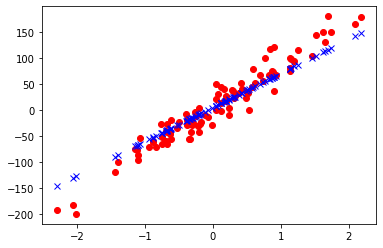

In [24]:
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'bx')
plt.show()

# Logistic Regression

In [25]:
# 1) Design models (input size, output size, forward pass layers)
# 2) Construct loss, optimizer
# 3) Construct training loop: 
    # forward (preds + loss), backward (grads), update (weights)

In [27]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**0) Data Prep**

In [28]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(f'n_samples: {n_samples}, n_features: {n_features}')

n_samples: 569, n_features: 30


In [43]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [44]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=1234)

# Scale with 0 mean and 1 variance (recommended for log. reg.)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [32]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  torch.Size([455, 30])
y_train shape:  torch.Size([455])
X_test shape:  torch.Size([114, 30])
y_test shape:  torch.Size([114])


In [33]:
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [34]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  torch.Size([455, 30])
y_train shape:  torch.Size([455, 1])
X_test shape:  torch.Size([114, 30])
y_test shape:  torch.Size([114, 1])


**1) Model**

In [35]:
# Our model is a lienar combination of weights and biases (affine maps)
# Followed by non-linear and sigmoid activation

class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [36]:
model = LogisticRegression(n_features)

**2) Loss and optimizer**

In [37]:
criterion = nn.BCELoss()
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

**3) Training loop**

In [38]:
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    
    # Backward pass
    loss.backward()
    
    # Optimizer step
    optimizer.step()
    optimizer.zero_grad()
    
    # Print progress
    if epoch%5==0:
        print(f'epoch: {epoch}, loss: {loss}')

epoch: 0, loss: 0.9731218218803406
epoch: 5, loss: 0.8152727484703064
epoch: 10, loss: 0.6979632377624512
epoch: 15, loss: 0.6115865707397461
epoch: 20, loss: 0.5468251705169678
epoch: 25, loss: 0.49686503410339355
epoch: 30, loss: 0.45722517371177673
epoch: 35, loss: 0.42499813437461853
epoch: 40, loss: 0.3982560634613037
epoch: 45, loss: 0.3756813704967499
epoch: 50, loss: 0.3563462197780609
epoch: 55, loss: 0.33957943320274353
epoch: 60, loss: 0.32488375902175903
epoch: 65, loss: 0.3118833005428314
epoch: 70, loss: 0.30028849840164185
epoch: 75, loss: 0.2898728847503662
epoch: 80, loss: 0.28045654296875
epoch: 85, loss: 0.2718949317932129
epoch: 90, loss: 0.26407045125961304
epoch: 95, loss: 0.2568865120410919


**4) Evaluation**

In [40]:
with torch.no_grad():
    y_pred = model(X_test)
    pred_classes = y_pred.round()
    acc = pred_classes.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

accuracy = 0.9035
